In [1]:
import os
os.environ['Secret-Key'] = 'XXXXX'
os.environ['Bin-API-Key'] = 'XXXXX'

In [2]:
import datetime

# Define the start and end times for the data
end_time = datetime.datetime.now()
start_time = end_time - datetime.timedelta(days=365)

In [3]:
# Convert the times to Unix timestamps in milliseconds
start_timestamp = int(start_time.timestamp() * 1000)
end_timestamp = int(end_time.timestamp() * 1000)

In [4]:
import requests
import json
import time

# Define the Binance API endpoint for K-line data
endpoint = 'https://api.binance.com/api/v3/klines'

# Define the parameters for the API request
symbol = 'BTCUSDT'
interval = '1m'
limit = 1000
params = {'symbol': symbol, 'interval': interval, 'startTime': start_timestamp, 'endTime': end_timestamp, 'limit': limit}

# Send the API request and store the response data in a list
data = []
while True:
    response = requests.get(endpoint, params=params)
    klines = json.loads(response.text)
    data += klines
    if len(klines) < limit:
        break
    params['startTime'] = int(klines[-1][0]) + 1
    time.sleep(0.1)

In [5]:
# Create a pandas dataframe with the OHLC data and timestamps
ohlc_data = [[float(kline[1]), float(kline[2]), float(kline[3]), float(kline[4])] for kline in data]
df = pd.DataFrame(ohlc_data, columns=['Open', 'High', 'Low', 'Close'])
timestamps = [datetime.datetime.fromtimestamp(int(kline[0]) / 1000) for kline in data]
df['Timestamp'] = timestamps
df.set_index('Timestamp', inplace=True)

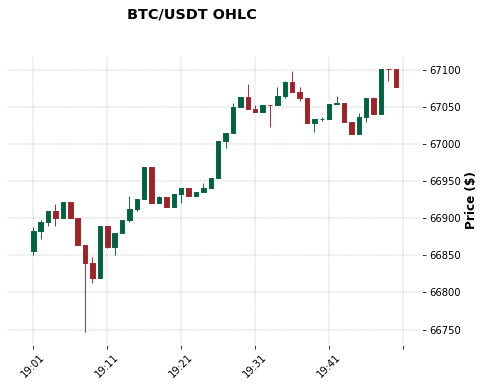

In [6]:
# Define the style for the plot
style = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})

# Create the OHLC plot
mpf.plot(df[-50:], type='candle', style=style, title='BTC/USDT OHLC', ylabel='Price ($)')

In [7]:
# Define the Binance API endpoint for K-line data
endpoint = 'https://fapi.binance.com/fapi/v1/klines'

# Define the parameters for the API request
symbol = 'BTCUSDT'
interval = '1m'
limit = 1000
params = {'symbol': symbol, 'interval': interval, 'startTime': start_timestamp, 'endTime': end_timestamp, 'limit': limit}

# Send the API request and store the response data in a list
data = []
while True:
    response = requests.get(endpoint, params=params)
    klines = json.loads(response.text)
    data += klines
    if len(klines) < limit:
        break
    params['startTime'] = int(klines[-1][0]) + 1
    time.sleep(0.1)

In [8]:
# Create a pandas dataframe with the OHLC data and timestamps
ohlc_data = [[float(kline[1]), float(kline[2]), float(kline[3]), float(kline[4])] for kline in data]
df = pd.DataFrame(ohlc_data, columns=['Open', 'High', 'Low', 'Close'])
timestamps = [datetime.datetime.fromtimestamp(int(kline[0]) / 1000) for kline in data]
df['Timestamp'] = timestamps
df.set_index('Timestamp', inplace=True)

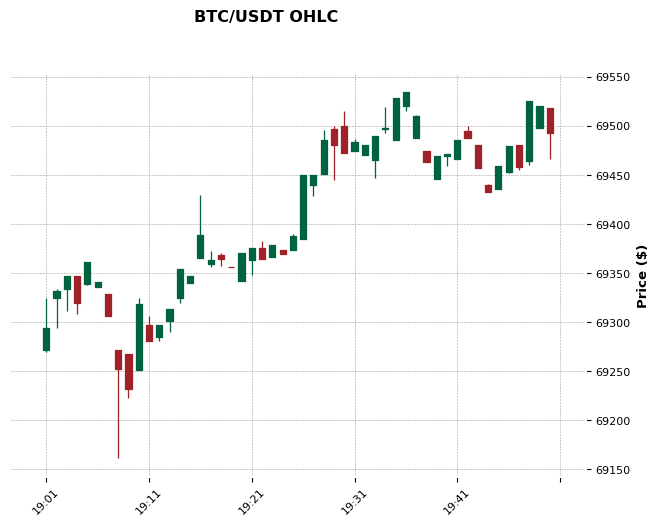

In [9]:
# Define the style for the plot
style = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})

# Create the OHLC plot
mpf.plot(df[-50:], type='candle', style=style, title='BTC/USDT OHLC', ylabel='Price ($)')